In [58]:
import zarr
import napari
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

# Immobilized

## Segmentation

In [13]:
fname = r"Y:\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-long\1-segmentation\masks_4500.zarr"
z = zarr.open(fname)
cmap = {i+1:'gray' for i in range(5000)}
napari.view_labels(z, ndisplay=3, color=cmap);

## Training data

In [9]:
fname = r"Y:\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-long\2-training_data\reindexed_segmentation.zarr"
z = zarr.open(fname)
napari.view_labels(z, ndisplay=3);

## Tracking

In [10]:
fname = r"Y:\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-long\3-tracking\segmentation_from_tracking.zarr"
z = zarr.open(fname)
napari.view_labels(z, ndisplay=3);

## Final Matches

In [11]:
fname = r"Y:\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-long\4-traces\reindexed_masks.zarr"
z = zarr.open(fname)
napari.view_labels(z, ndisplay=3);

# WBFM tracking statistics

In [20]:
fname = r"Y:\shared_projects\wbfm\dlc_stacks\Charlie-worm3-long\3-tracking\manual_tracking\worm3_neurons.xlsx"
tracking_4207_RMED = pd.read_excel(fname, sheet_name='neuron4207')
tracking_4453_mystery = pd.read_excel(fname, sheet_name='neuron4453')
tracking_4528_VB02 = pd.read_excel(fname, sheet_name='neuron4528')

In [48]:
def pretty_print_statistics(df):
    # First: DLC failures
    dlc_success = 100*(df['Track Code']==0).sum() / len(df)
    dlc_absent = 100*(df['Track Code']==1).sum() / len(df)
    dlc_mistake = 100*(df['Track Code']==2).sum() / len(df)
    print("dlc_success ", dlc_success)
    print("dlc_absent ", dlc_absent)
    print("dlc_mistake ", dlc_mistake)

    # Second: Segmentation failures
    seg_success = 100*(df['Seg Code']==0).sum() / len(df)
    seg_absent = 100*(df['Seg Code']==1).sum() / len(df)
    seg_mistake = 100*(df['Seg Code']==2).sum() / len(df)
    print("seg_success ", seg_success)
    print("seg_absent ", seg_absent)
    print("seg_mistake ", seg_mistake)
    
    # Matching
    match_mistake = 100*(df['Seg Code']==3).sum() / len(df)
    print("match_mistake ", match_mistake)

## RMED

In [49]:
print("For RMED:")
pretty_print_statistics(tracking_4207_RMED)

For RMED:
dlc_success  89.8
dlc_absent  9.2
dlc_mistake  0.8666666666666667
seg_success  85.53333333333333
seg_absent  13.066666666666666
seg_mistake  0.06666666666666667
match_mistake  1.3333333333333333


In [50]:
print("For mystery neuron: ")
pretty_print_statistics(tracking_4453_mystery)

For mystery neuron: 
dlc_success  91.38851802403204
dlc_absent  8.411214953271028
dlc_mistake  0.13351134846461948
seg_success  86.91588785046729
seg_absent  1.9359145527369825
seg_mistake  2.937249666221629
match_mistake  8.01068090787717


In [51]:
print("For VB02: ")
pretty_print_statistics(tracking_4528_VB02)

For VB02: 
dlc_success  66.22162883845127
dlc_absent  31.5086782376502
dlc_mistake  2.0026702269692924
seg_success  90.3871829105474
seg_absent  0.6008010680907877
seg_mistake  3.2042723631508676
match_mistake  5.807743658210948


# WBFM traces

In [112]:
project_dir = r"Y:\shared_projects\wbfm\dlc_stacks\Charlie-worm3-long"

fname = r"Y:\shared_projects\wbfm\dlc_stacks\Charlie-worm3-long\4-traces\retracked_neurons\red_traces.h5"
red_dat = pd.read_hdf(fname)

fname = r"Y:\shared_projects\wbfm\dlc_stacks\Charlie-worm3-long\4-traces\retracked_neurons\green_traces.h5"
green_dat = pd.read_hdf(fname)

fname = r"Y:\shared_projects\wbfm\dlc_stacks\Charlie-worm3-long\3-tracking\manual_tracking\worm3_neurons.xlsx"
behavior_dat = pd.read_excel(fname, sheet_name='behavior')

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

import matplotlib
matplotlib.rc('font', **font)

In [102]:
def shade_using_behavior(bh, DEBUG=False):
    """
    Shades current plot using a 3-code behavioral annotation:
        0 - FWD (no shade)
        1 - REV (gray)
        2 - Turn (red)
    """
    
    bh = np.array(bh)
    
    block_final_indices = np.where(np.diff(bh))[0]
    block_values = bh[block_final_indices]
    if DEBUG:
        print(block_values)
        print(block_final_indices)
    
    cmap = {0: None,
            1: 'gray',
            2: 'red'}
    
    block_start = 0
    for val, block_end in zip(block_values, block_final_indices):
        color = cmap[val]
        if DEBUG:
            print(color, val, block_start, block_end)
        if color is not None:
            plt.axvspan(block_start, block_end, alpha=0.5, color=color)
        
        block_start = block_end+1

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


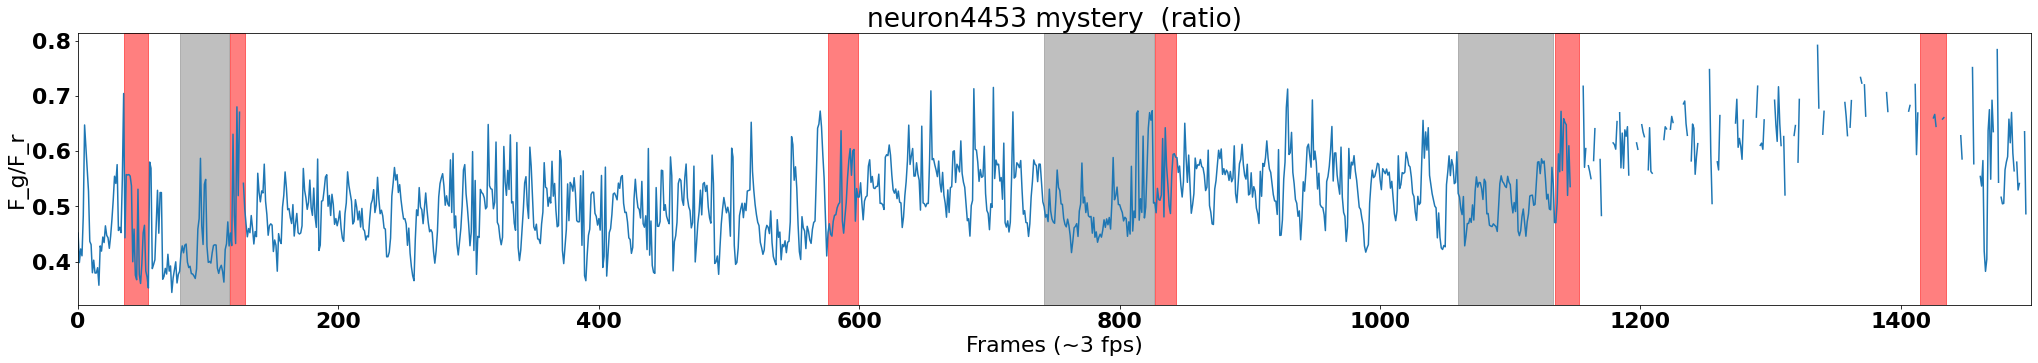

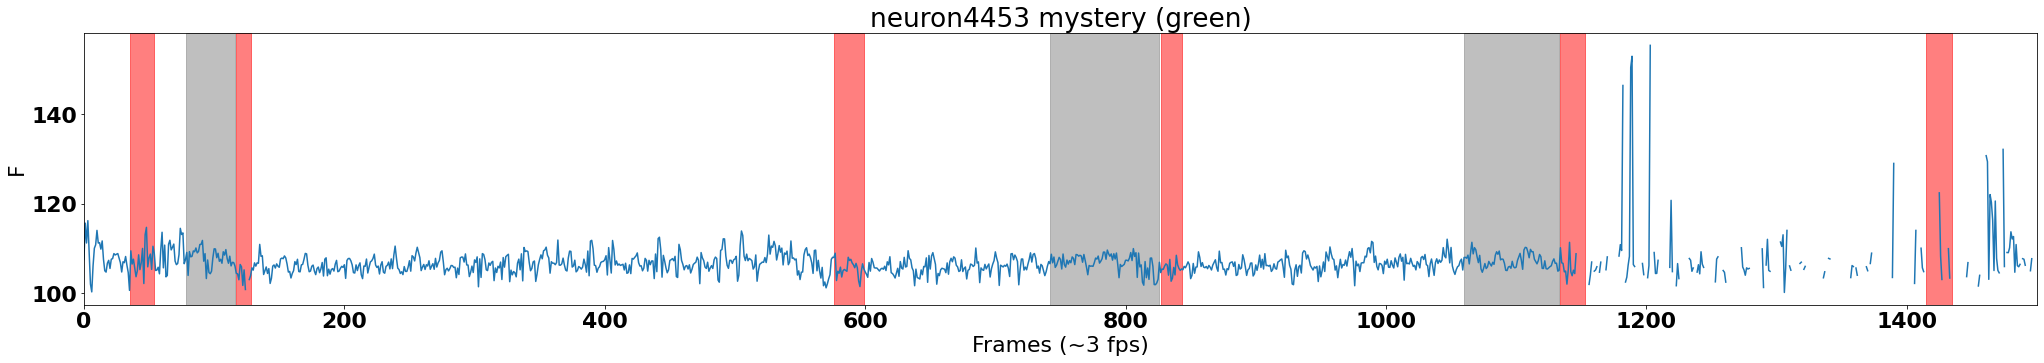

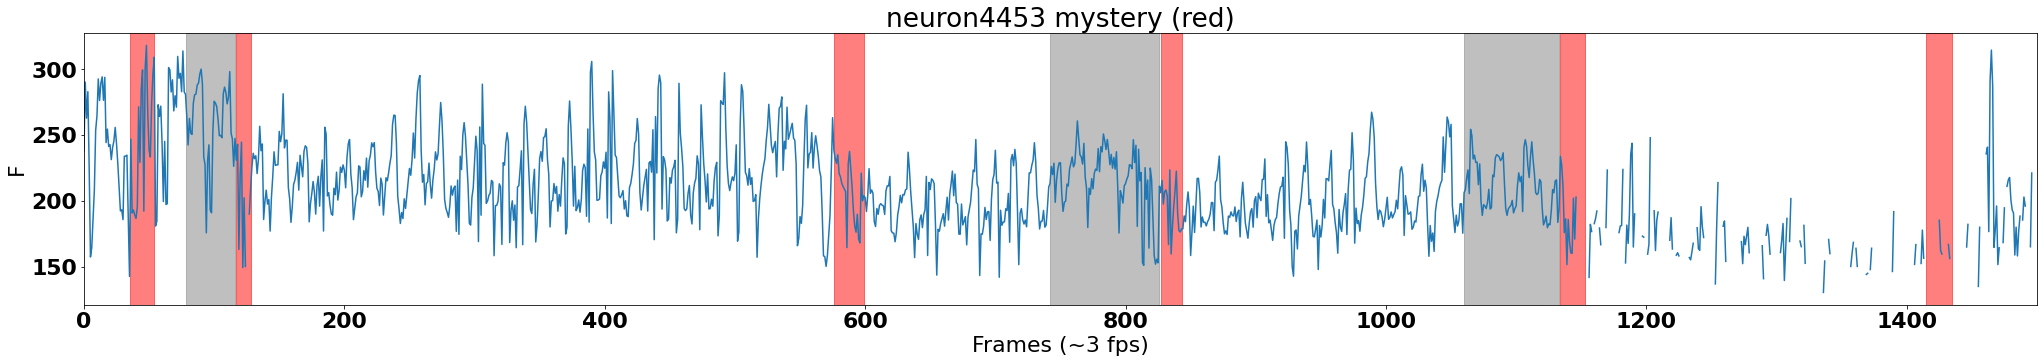

In [113]:
name = 'neuron4453'
neuron_id = 'mystery'
g = green_dat[name]
r = red_dat[name]

save_dir = os.path.join(project_dir, '4-traces', 'retracked_neurons')

plt.figure(figsize=(35,5))
plt.plot(g['brightness'] / r['brightness'])
plt.title(f"{name} {neuron_id}  (ratio)")
plt.xlim([0,1500])
plt.ylabel("F_g/F_r")
plt.xlabel("Frames (~3 fps)")
shade_using_behavior(behavior_dat['Annotation'])
plt.savefig(os.path.join(save_dir, f'{name}_{neuron_id}_ratio.png'))

plt.figure(figsize=(35,5))
plt.plot(g['brightness'] / g['volume'])
plt.title(f"{name} {neuron_id} (green)")
plt.xlim([0,1500])
plt.ylabel("F")
plt.xlabel("Frames (~3 fps)")
shade_using_behavior(behavior_dat['Annotation'])
plt.savefig(os.path.join(save_dir, f'{name}_{neuron_id}_green.png'))

plt.figure(figsize=(35,5))
plt.plot(r['brightness'] / r['volume'])
plt.title(f"{name} {neuron_id} (red)")
plt.xlim([0,1500])
plt.ylabel("F")
plt.xlabel("Frames (~3 fps)")
shade_using_behavior(behavior_dat['Annotation'])
plt.savefig(os.path.join(save_dir, f'{name}_{neuron_id}_red.png'))

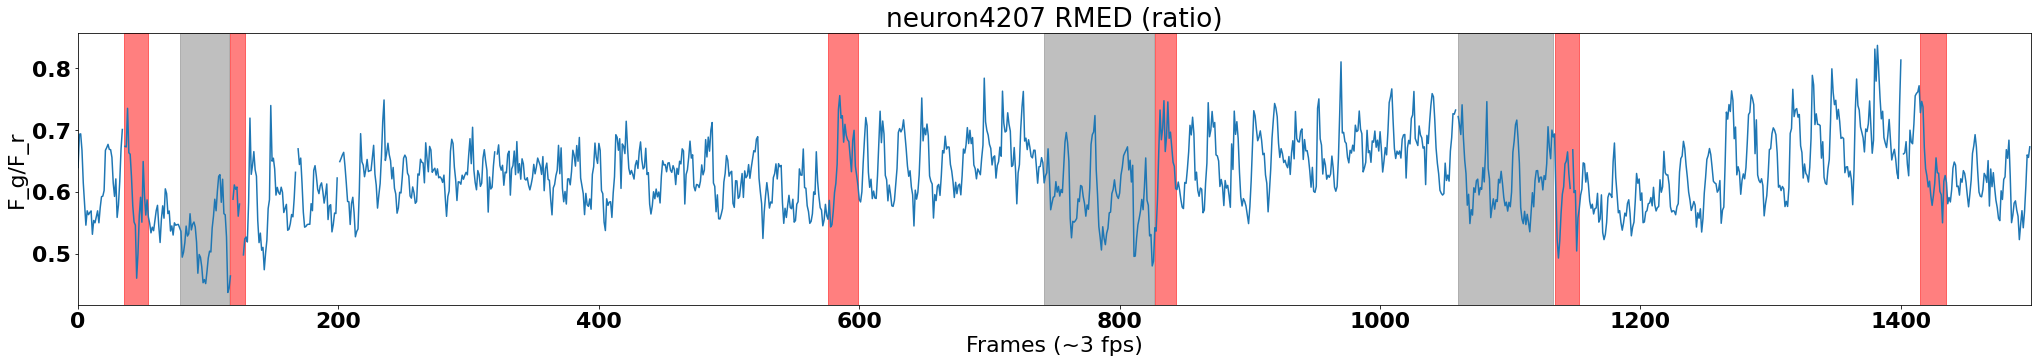

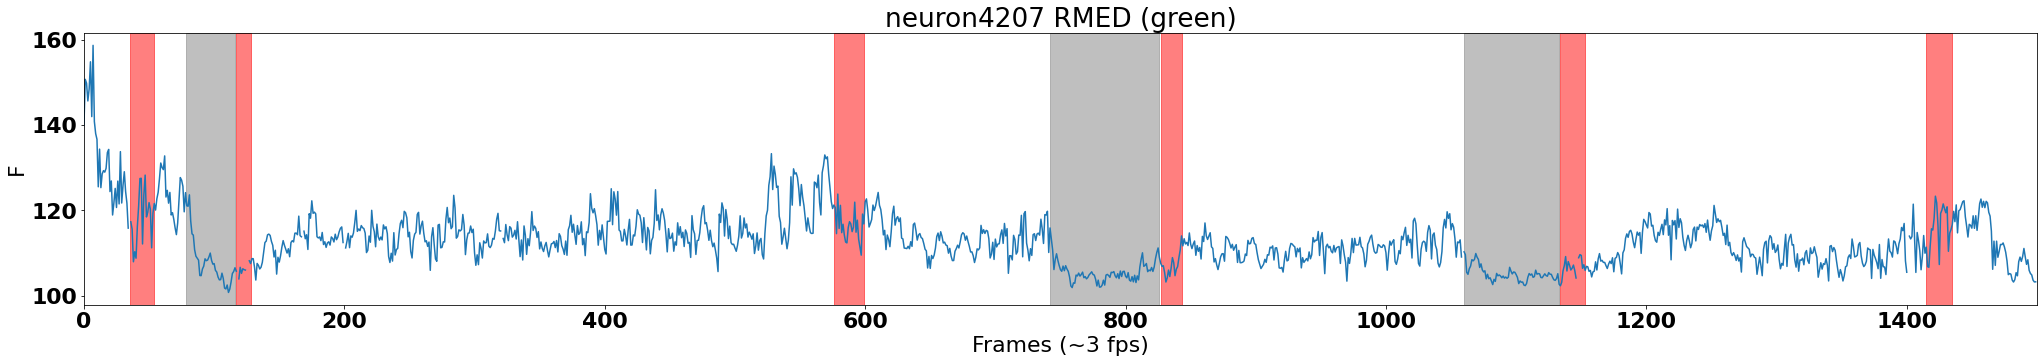

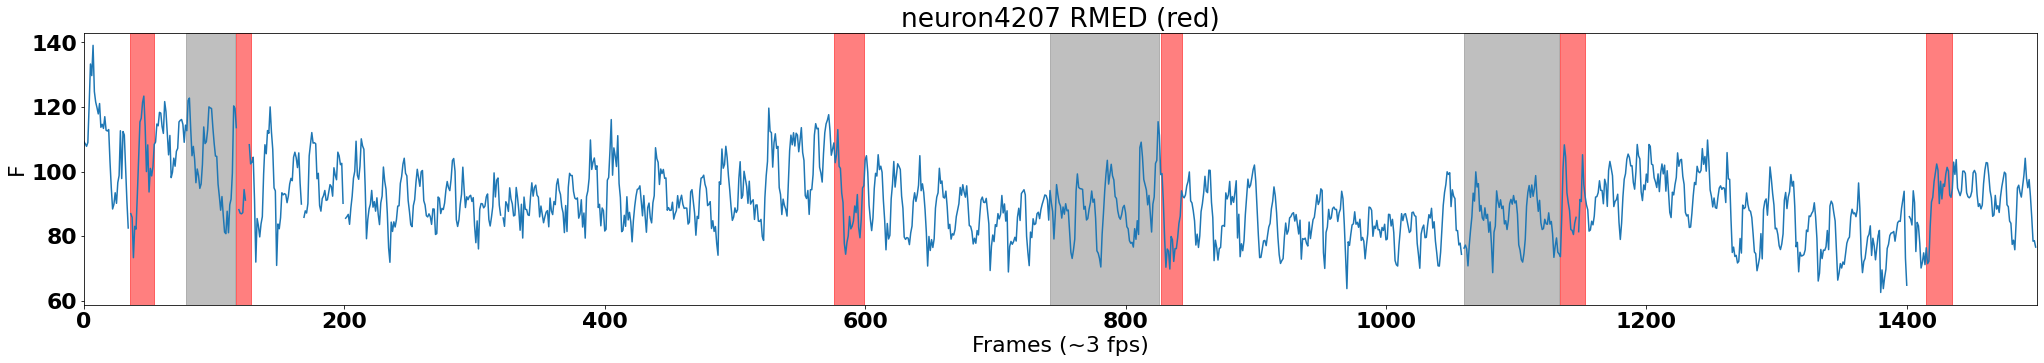

In [114]:
name = 'neuron4207'
neuron_id = 'RMED'
g = green_dat[name]
r = red_dat[name]

save_dir = os.path.join(project_dir, '4-traces', 'retracked_neurons')

plt.figure(figsize=(35,5))
plt.plot((g['brightness']-100) / (r['brightness']-100))
plt.title(f"{name} {neuron_id} (ratio)")
plt.xlim([0,1500])
plt.ylabel("F_g/F_r")
plt.xlabel("Frames (~3 fps)")
shade_using_behavior(behavior_dat['Annotation'])
plt.savefig(os.path.join(save_dir, f'{name}_{neuron_id}_ratio.png'))

plt.figure(figsize=(35,5))
plt.plot(g['brightness'] / g['volume'])
plt.title(f"{name} {neuron_id} (green)")
plt.xlim([0,1500])
plt.ylabel("F")
plt.xlabel("Frames (~3 fps)")
shade_using_behavior(behavior_dat['Annotation'])
plt.savefig(os.path.join(save_dir, f'{name}_{neuron_id}_green.png'))

plt.figure(figsize=(35,5))
plt.plot(r['brightness'] / r['volume'] / 2)
plt.title(f"{name} {neuron_id} (red)")
plt.xlim([0,1500])
plt.ylabel("F")
plt.xlabel("Frames (~3 fps)")
shade_using_behavior(behavior_dat['Annotation'])
plt.savefig(os.path.join(save_dir, f'{name}_{neuron_id}_red.png'))

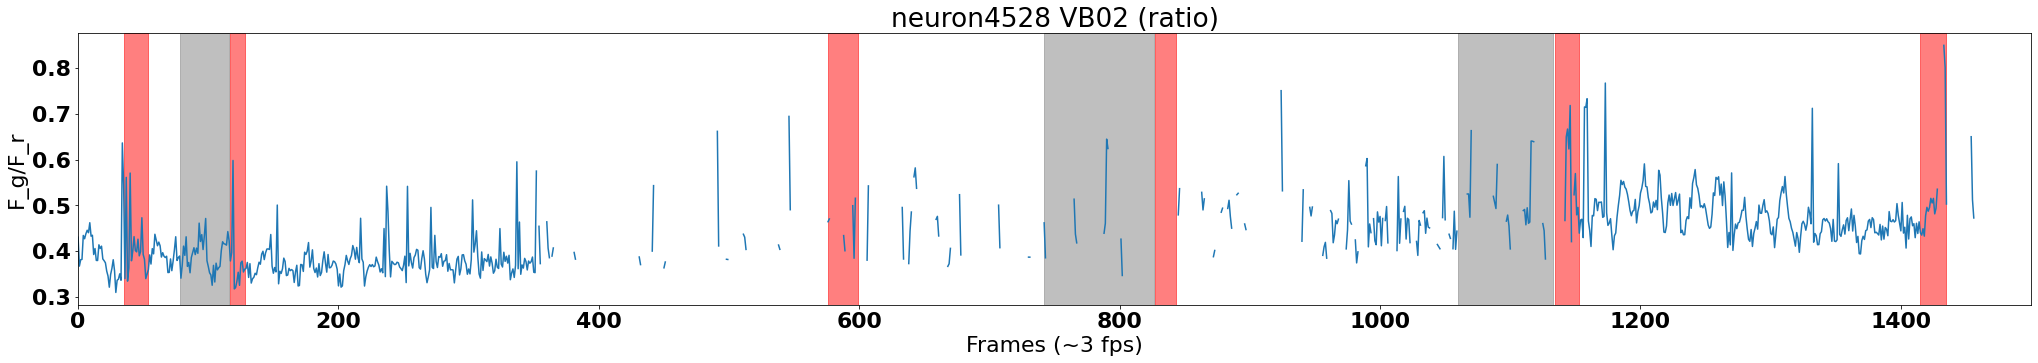

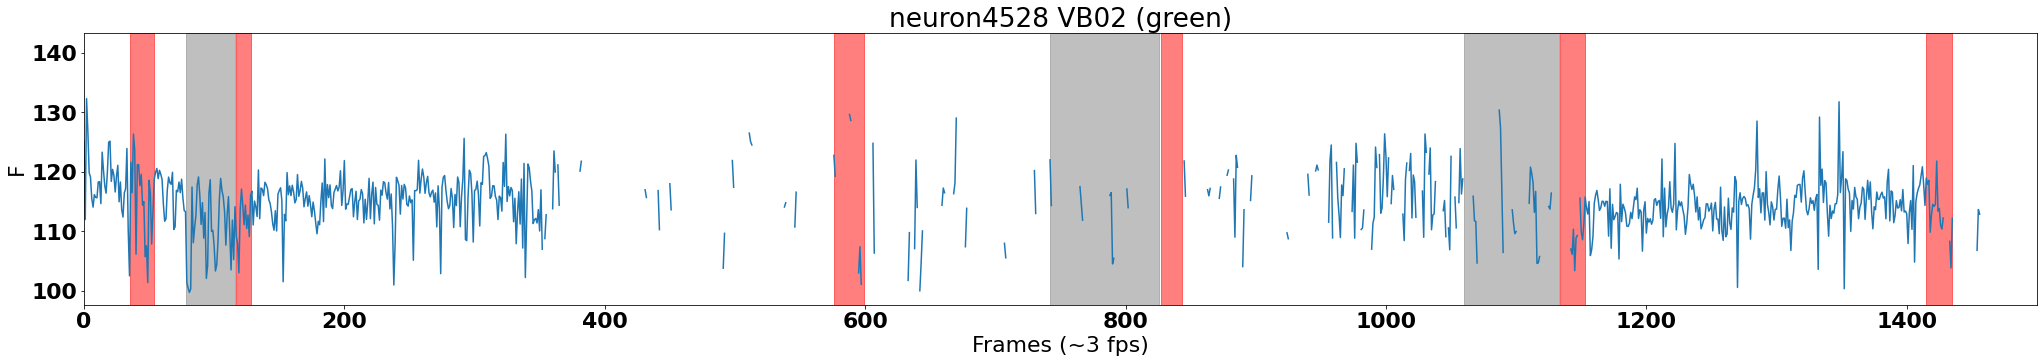

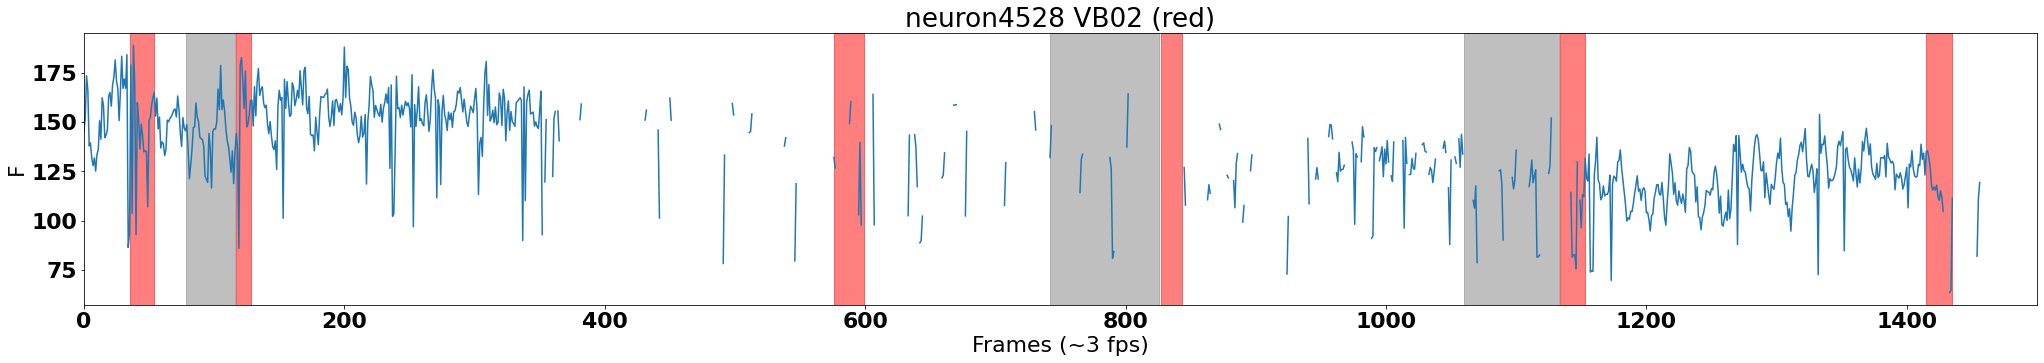

In [115]:
name = 'neuron4528'
neuron_id = 'VB02'
g = green_dat[name]
r = red_dat[name]

save_dir = os.path.join(project_dir, '4-traces', 'retracked_neurons')

plt.figure(figsize=(35,5))
plt.plot((g['brightness']-100) / (r['brightness']-100))
plt.title(f"{name} {neuron_id} (ratio)")
plt.xlim([0,1500])
plt.ylabel("F_g/F_r")
plt.xlabel("Frames (~3 fps)")
shade_using_behavior(behavior_dat['Annotation'])
plt.savefig(os.path.join(save_dir, f'{name}_{neuron_id}_ratio.png'))

plt.figure(figsize=(35,5))
plt.plot(g['brightness'] / g['volume'])
plt.title(f"{name} {neuron_id} (green)")
plt.xlim([0,1500])
plt.ylabel("F")
plt.xlabel("Frames (~3 fps)")
shade_using_behavior(behavior_dat['Annotation'])
plt.savefig(os.path.join(save_dir, f'{name}_{neuron_id}_green.png'))

plt.figure(figsize=(35,5))
plt.plot(r['brightness'] / r['volume'] / 2)
plt.title(f"{name} {neuron_id} (red)")
plt.xlim([0,1500])
plt.ylabel("F")
plt.xlabel("Frames (~3 fps)")
shade_using_behavior(behavior_dat['Annotation'])
plt.savefig(os.path.join(save_dir, f'{name}_{neuron_id}_red.png'))

# Attempts to denoise RMED trace

## ICA

In [116]:
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler

In [164]:
name = 'neuron4207'
neuron_id = 'RMED'
g = green_dat[name]
r = red_dat[name]

g_trace = np.array(g['brightness'] / g['volume'])
r_trace = np.array(r['brightness'] / r['volume'])

# Deal with missing
missing_ind = np.where(np.isnan(g_trace))[0]
for i in missing_ind:
    g_trace[i] = 0.0
    r_trace[i] = 0.0
#     g_trace[i] = g_trace[i-1]
#     r_trace[i] = r_trace[i-1]


In [170]:
model = FastICA(n_components=2)
X_transformed = model.fit_transform(np.vstack([g_trace, r_trace]).T)

X_transformed[missing_ind, :] = np.nan
g_trace[missing_ind] = np.nan

In [166]:
model.components_

array([[-0.00255385,  0.00155332],
       [ 0.00261893, -0.00017778]])

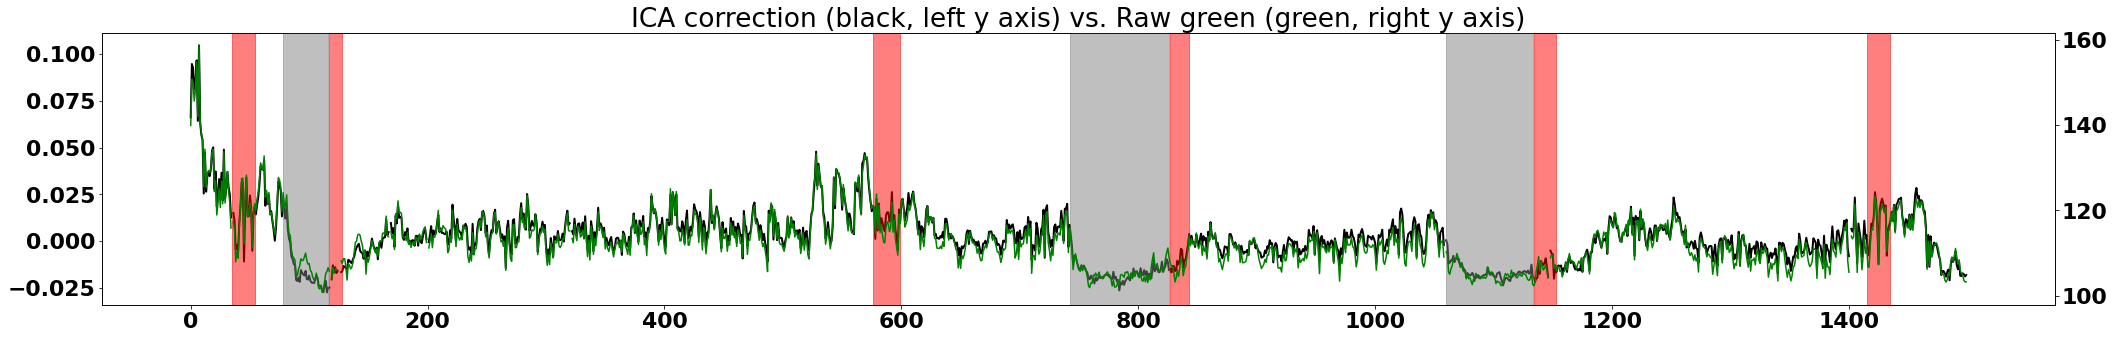

In [185]:
# plt.figure(figsize=(35,5))
fig, ax1 = plt.subplots(figsize=(35,5))
ax1.plot(X_transformed[:,1], 'k', label="ICA Correction", linewidth=2)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(g_trace, 'g', label="Raw green trace")
shade_using_behavior(behavior_dat['Annotation'])
plt.title("ICA correction (black, left y axis) vs. Raw green (green, right y axis)")
plt.savefig(os.path.join(save_dir, f'{name}_{neuron_id}_ICA.png'))

# Correlation between two red channels

In [216]:
name = 'neuron4207'
r = red_dat[name]

r_trace2 = np.array(r['brightness'] / r['volume'])

name = 'neuron4453'
r = red_dat[name]

r_trace1 = np.array(r['brightness'] / r['volume'])

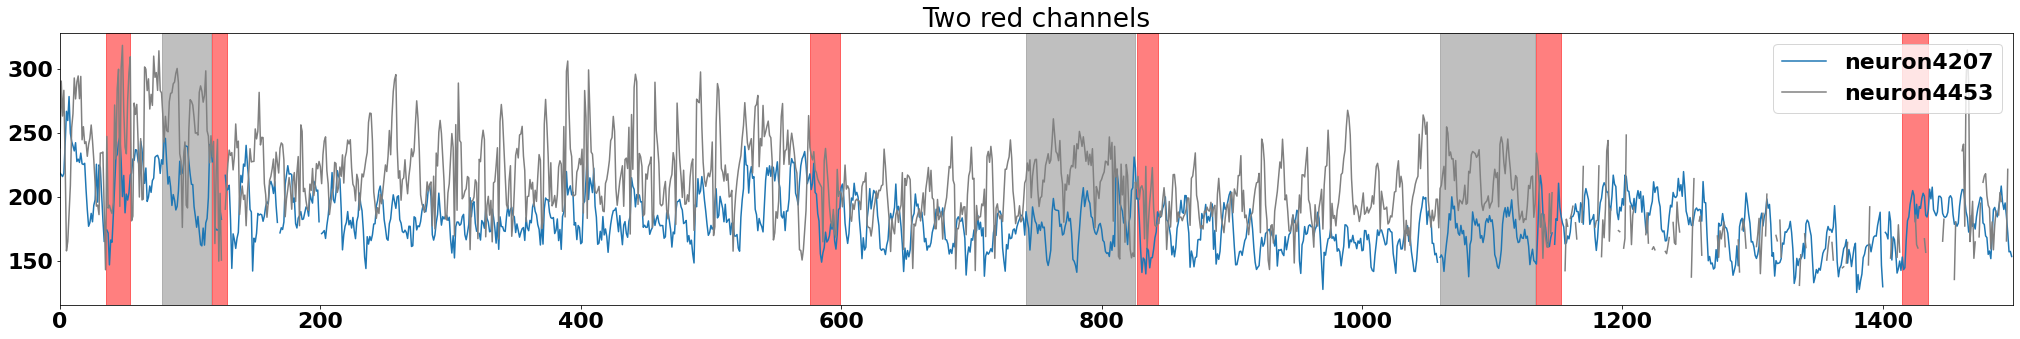

In [217]:
plt.figure(figsize=(35,5))
plt.plot(r_trace2, label='neuron4207')
plt.plot(r_trace1, 'gray', label='neuron4453')
plt.title(f"Two red channels")
plt.xlim([0,1500])
plt.legend(loc='upper right')
shade_using_behavior(behavior_dat['Annotation'])

In [199]:
from scipy.stats import pearsonr

In [201]:

# Deal with missing
missing_ind = np.where(np.isnan(r_trace1))[0]
for i in missing_ind:
    r_trace1[i] = 0.0
missing_ind = np.where(np.isnan(r_trace2))[0]
for i in missing_ind:
    r_trace2[i] = 0.0
    
pearsonr(r_trace1, r_trace2)

(0.18064449890889794, 1.8077608727960801e-12)

# Scratch

## ICA, but don't whiten

In [212]:
name = 'neuron4207'
neuron_id = 'RMED'
g = green_dat[name]
r = red_dat[name]

g_trace = np.array(g['brightness'] / g['volume'])
r_trace = np.array(r['brightness'] / r['volume'])

background = 90
g_trace, r_trace = g_trace-background, r_trace-background

# Deal with missing
missing_ind = np.where(np.isnan(g_trace))[0]
for i in missing_ind:
    g_trace[i] = 0.0
    r_trace[i] = 0.0
#     g_trace[i] = g_trace[i-1]
#     r_trace[i] = r_trace[i-1]


In [213]:
model = FastICA(n_components=2, whiten=False)
X_transformed = model.fit_transform(np.vstack([g_trace, r_trace]).T)

X_transformed[missing_ind, :] = np.nan
g_trace[missing_ind] = np.nan

C:\Users\charles.fieseler\Anaconda3\envs\DLC-for-WBFM\lib\site-packages\sklearn\decomposition\_fastica.py:462: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn('Ignoring n_components with whiten=False.')
C:\Users\charles.fieseler\Anaconda3\envs\DLC-for-WBFM\lib\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


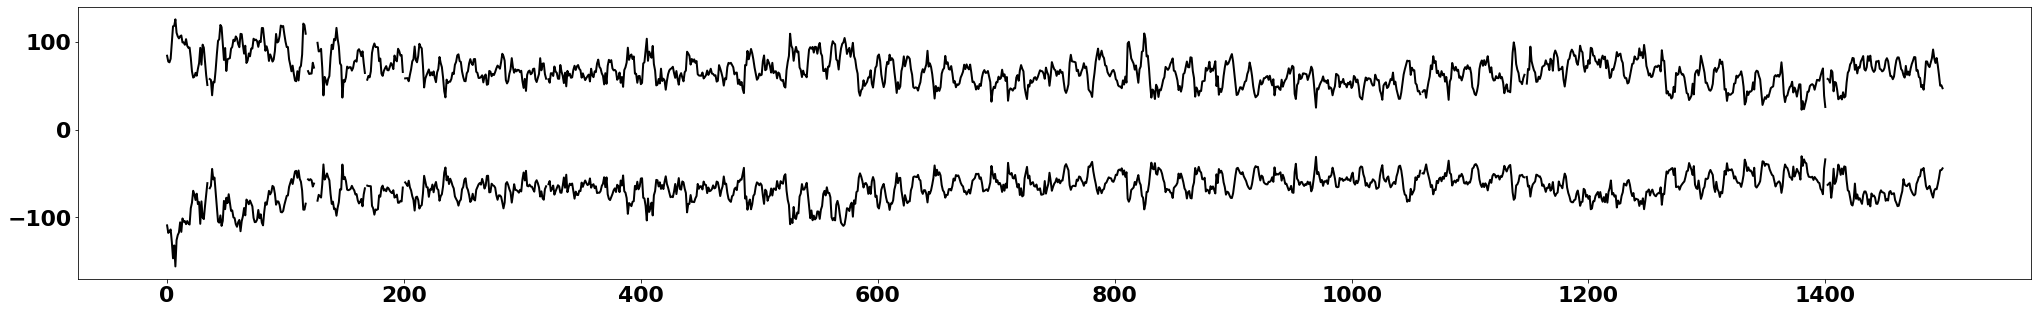

In [214]:

fig, ax1 = plt.subplots(figsize=(35,5))
ax1.plot(X_transformed[:,0], 'k', label="ICA Correction", linewidth=2)
ax1.plot(X_transformed[:,1], 'k', label="ICA Correction", linewidth=2)

# Power spectrum of red

In [224]:
name = 'neuron4207'
neuron_id = 'RMED'
g = green_dat[name]
r = red_dat[name]

g_trace = np.array(g['brightness'] / g['volume'])
r_trace = np.array(r['brightness'] / r['volume'])

# Deal with missing
missing_ind = np.where(np.isnan(g_trace))[0]
for i in missing_ind:
#     g_trace[i] = 0.0
#     r_trace[i] = 0.0
    g_trace[i] = g_trace[i-1]
    r_trace[i] = r_trace[i-1]

r_trace -= np.mean(r_trace)

(0.0, 0.5)

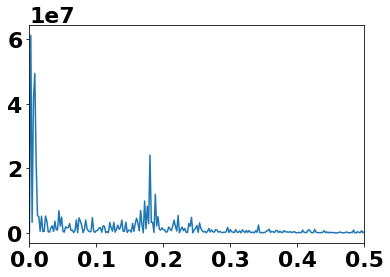

In [250]:
ps = np.abs(np.fft.fft(r_trace))**2

sample_freq = 3
time_step = 1 / sample_freq
freqs = np.fft.fftfreq(r_trace.size, time_step)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps[idx])
plt.xlim([0, 0.5])

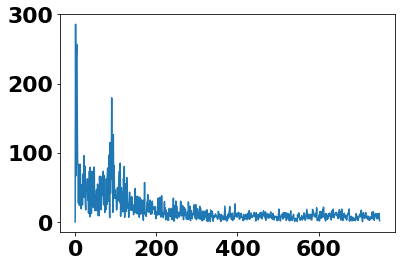

In [260]:
import scipy
f, Pxx_spec = scipy.signal.periodogram(r_trace, fs=1.0);
plt.plot(np.sqrt(Pxx_spec));

In [293]:
from scipy.signal import iirnotch, filtfilt

# Remove spike at zero
start_freq = 50
max_freq = np.argmax(Pxx_spec[start_freq:]) + start_freq
# max_freq = 500
print(max_freq)

# Filter that frequency
Q = 0.5 # Quality factor
b, a = iirnotch(1, Q, max_freq)

# Apply
r_filtered = filtfilt(b, a, r_trace)

90


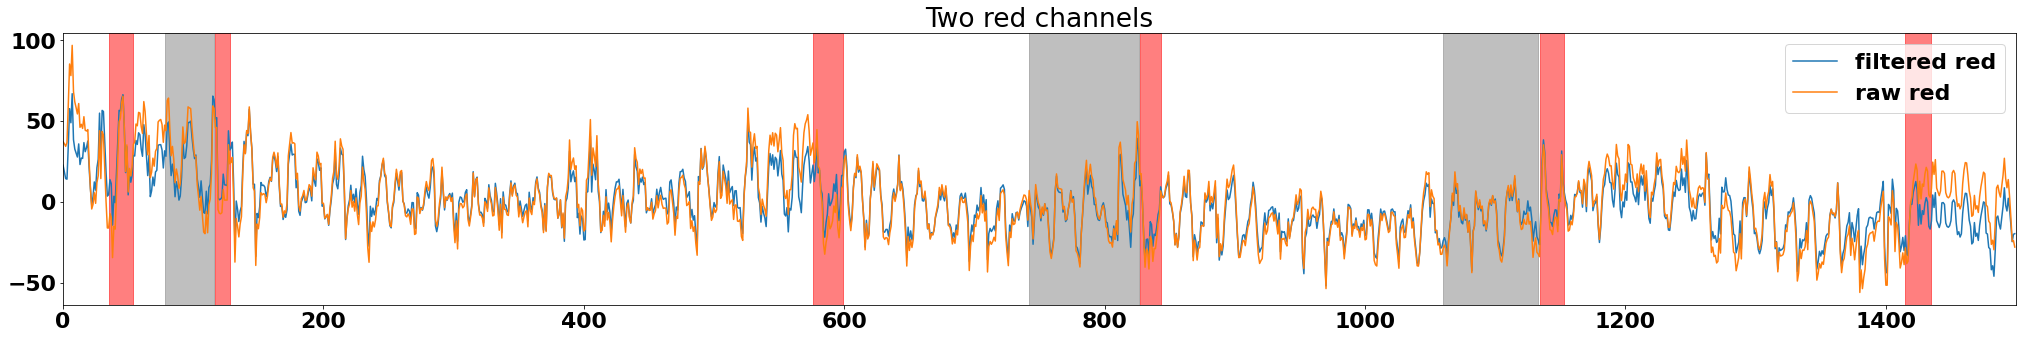

In [294]:
plt.figure(figsize=(35,5))
plt.plot(r_filtered, label='filtered red')
plt.plot(r_trace, label='raw red')
plt.title(f"Two red channels")
plt.xlim([0,1500])
plt.legend(loc='upper right')
shade_using_behavior(behavior_dat['Annotation'])